In [1]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import preprocessing
#from statsmodels.api import datasets
from sklearn import datasets ## Get dataset from sklearn
import sklearn.model_selection as ms
import sklearn.metrics as sklm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numpy.random as nr

In [2]:
data1 = pd.read_csv('train_values_oAriVNN.csv')
Labels1 = np.array(pd.read_csv('train_labels.csv'))
Labels=Labels1[:, [1]]
Labels = Labels.reshape(Labels.shape[0],)
print(data1.shape)
print(Labels.shape)

(2546, 48)
(2546,)


In [3]:
data1.drop(["row_id","county_code","state"], axis=1, inplace=True)
data1.pct_adult_smoking = data1.pct_adult_smoking.fillna(data1.pct_adult_smoking.mean())
data1.pct_low_birthweight = data1.pct_low_birthweight.fillna(data1.pct_low_birthweight.mean())
data1.pct_excessive_drinking = data1.pct_excessive_drinking.fillna(data1.pct_excessive_drinking.mean())
data1.homicides_per_100k = data1.homicides_per_100k.fillna(0)
data1.motor_vehicle_crash_deaths_per_100k = data1.motor_vehicle_crash_deaths_per_100k.fillna(0)
data1.pop_per_dentist = data1.pop_per_dentist.fillna(data1.pop_per_dentist.mean())
data1.pop_per_primary_care_physician = data1.pop_per_primary_care_physician.fillna(data1.pop_per_primary_care_physician.mean())
#df.median_property_value = df.median_property_value.fillna(df.median_property_value.median())
#df.median_household_income = df.median_household_income.fillna(df.median_household_income.median())
#df.air_pollution_particulate_matter_value = df.air_pollution_particulate_matter_value.fillna(df.air_pollution_particulate_matter_value.median())

#data1.drop(["pct_adult_smoking","pct_low_birthweight","pct_excessive_drinking","homicides_per_100k","motor_vehicle_crash_deaths_per_100k","pop_per_dentist","pop_per_primary_care_physician"], axis=1, inplace=True)

columns = ["rucc", "urban_influence", "economic_typology","year"]
data1 = pd.get_dummies(data1, columns=columns)
data1.head(10)

,population,renter_occupied_households,pct_renter_occupied,median_gross_rent,median_household_income,median_property_value,rent_burden,pct_white,pct_af_am,pct_hispanic,...,"urban_influence_Noncore not adjacent to a metro/micro area and does not contain a town of at least 2,500 residents",urban_influence_Small-in a metro area with fewer than 1 million residents,economic_typology_Farm-dependent,economic_typology_Federal/State government-dependent,economic_typology_Manufacturing-dependent,economic_typology_Mining-dependent,economic_typology_Nonspecialized,economic_typology_Recreation,year_a,year_b
0,45009.0,6944.0,37.218,643.0,33315.0,98494.0,33.389,0.412070,0.493459,0.070193,...,0,0,0,0,0,0,1,0,0,1
1,9872.0,1224.0,31.773,517.0,43724.0,85444.0,26.477,0.838682,0.015588,0.037419,...,0,0,0,0,0,0,1,0,1,0
2,17625.0,1725.0,21.973,671.0,37777.0,136162.0,32.500,0.873733,0.041040,0.046922,...,0,0,0,0,0,0,0,1,0,1
3,134136.0,18180.0,36.809,603.0,30607.0,70062.0,31.959,0.264083,0.240836,0.081067,...,0,0,0,0,0,0,1,0,1,0
4,6936.0,551.0,17.627,668.0,44237.0,187066.0,29.339,0.924502,0.005146,0.035753,...,0,1,0,1,0,0,0,0,1,0
5,985597.0,195220.0,48.578,1001.0,57207.0,240149.0,29.990,0.403816,0.435500,0.076131,...,0,0,0,0,0,0,1,0,0,1
6,18330.0,2256.0,30.415,522.0,29778.0,88617.0,26.880,0.954062,0.007812,0.017288,...,0,0,1,0,0,0,0,0,1,0
7,185248.0,13778.0,18.446,953.0,91954.0,255951.0,26.738,0.870105,0.036080,0.023532,...,0,0,0,0,0,0,1,0,1,0
8,46558.0,4382.0,23.017,674.0,48484.0,124230.0,27.064,0.884962,0.005766,0.092045,...,0,0,0,0,1,0,0,0,0,1
9,27319.0,2543.0,21.691,617.0,35375.0,78601.0,30.516,0.618519,0.354544,0.017676,...,0,1,0,0,0,0,1,0,0,1


In [4]:
data=data1.fillna(value=0)
print(data.shape)

(2546, 70)


In [5]:
from sklearn import feature_selection as fs
print(data.shape)

## Define the variance threhold and fit the threshold to the feature array. 
sel = fs.VarianceThreshold(threshold=(.9 * (1 - .9)))
Features_reduced= sel.fit_transform(data)

## Print the support and shape for the transformed features
print(sel.get_support())
print(Features_reduced.shape)

(2546, 70)
[ True  True  True  True  True  True  True False False False False False
 False False False  True False False False False False False False False
 False False  True  True  True  True  True  True False False False False
 False False False  True  True  True  True  True False  True  True  True
 False False  True False False False False False  True False False False
 False  True  True  True  True False  True False  True  True]
(2546, 31)


In [6]:
Features=np.array(Features_reduced)

In [7]:
nr.seed(123)
inside = ms.KFold(n_splits=10, shuffle = True)
nr.seed(321)
outside = ms.KFold(n_splits=10, shuffle = True)

In [8]:
nr.seed(1115)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size =764)
X_train = Features[indx[0],:]
y_train = np.ravel(Labels[indx[0]])
X_test = Features[indx[1],:]
y_test = np.ravel(Labels[indx[1]])

In [9]:
from sklearn.preprocessing import StandardScaler

# Scale the data to be between -1 and 1
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape

(1782, 31)

In [21]:
#"learning_rate": [0.1, 1, 10]
nr.seed(1115)
gb_mod = GradientBoostingRegressor(learning_rate = 0.1, n_estimators=140) 
gb_mod.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=140, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

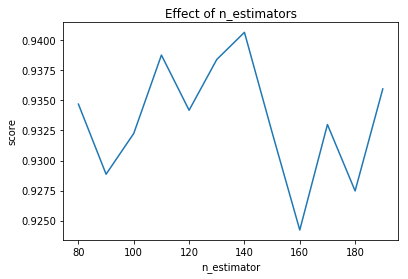

In [20]:
# Try different numbers of n_estimators - this will take a minute or so
estimators = np.arange(80, 200, 10)
scores = []
for n in estimators:
    gb_mod.set_params(n_estimators=n)
    gb_mod.fit(X_train, y_train)
    scores.append(gb_mod.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [19]:
scores

[0.7908180644370019,
 0.8853204973066294,
 0.9096082383741332,
 0.9089735367212954,
 0.9254957177487233,
 0.9298088268780401,
 0.9252480458282542,
 0.9249063857547266,
 0.9266407699772182,
 0.9249725005420293,
 0.9375276307775626]

In [22]:
import sklearn.metrics as sklm
import math
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_score = gb_mod.predict(X_test) 
print_metrics(y_test, y_score, 44)  

Mean Square Error      = 139079.11598781595
Root Mean Square Error = 372.9331253560294
Mean Absolute Error    = 136.967935230554
Median Absolute Error  = 26.99748340753009
R^2                    = 0.9314937493735328
Adjusted R^2           = 0.9274024038500077


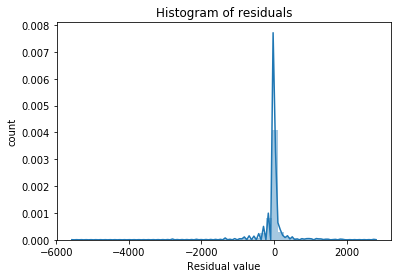

In [14]:
import seaborn as sns
def hist_resids(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.distplot(resids)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    
hist_resids(y_test, y_score) 

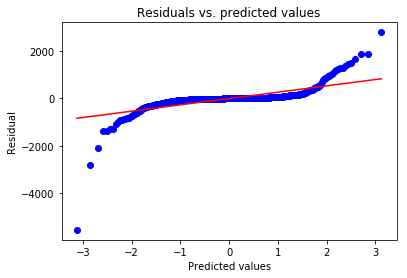

In [16]:
import scipy.stats as ss
def resid_qq(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    ss.probplot(resids.flatten(), plot = plt)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    
resid_qq(y_test, y_score)

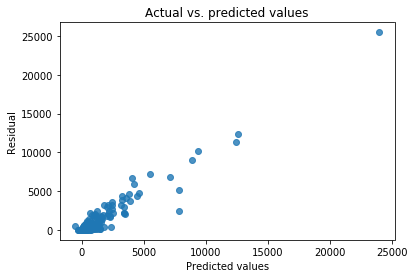

In [30]:
import seaborn as sns
def resid_plot(y_test, y_score):
    ## first compute vector of residuals. 
    ##resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.regplot(y_score, y_test, fit_reg=False)
    plt.title('Actual vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')

resid_plot(y_test, y_score) 

In [23]:
pred=pd.read_csv("test_values.csv")
print(pred.shape)

(2420, 48)


In [24]:
pred.drop(["row_id","county_code","state"], axis=1, inplace=True)
pred.pct_adult_smoking = pred.pct_adult_smoking.fillna(pred.pct_adult_smoking.mean())
pred.pct_low_birthweight = pred.pct_low_birthweight.fillna(pred.pct_low_birthweight.mean())
pred.pct_excessive_drinking = pred.pct_excessive_drinking.fillna(pred.pct_excessive_drinking.mean())
pred.homicides_per_100k = pred.homicides_per_100k.fillna(0)
pred.motor_vehicle_crash_deaths_per_100k = pred.motor_vehicle_crash_deaths_per_100k.fillna(0)
pred.pop_per_dentist = pred.pop_per_dentist.fillna(pred.pop_per_dentist.mean())
pred.pop_per_primary_care_physician = pred.pop_per_primary_care_physician.fillna(pred.pop_per_primary_care_physician.mean())
columns = ["rucc", "urban_influence", "economic_typology","year"]
pred = pd.get_dummies(pred, columns=columns)
pred.head(10)


,population,renter_occupied_households,pct_renter_occupied,median_gross_rent,median_household_income,median_property_value,rent_burden,pct_white,pct_af_am,pct_hispanic,...,"urban_influence_Noncore not adjacent to a metro/micro area and does not contain a town of at least 2,500 residents",urban_influence_Small-in a metro area with fewer than 1 million residents,economic_typology_Farm-dependent,economic_typology_Federal/State government-dependent,economic_typology_Manufacturing-dependent,economic_typology_Mining-dependent,economic_typology_Nonspecialized,economic_typology_Recreation,year_a,year_b
0,171046.0,17342.0,25.310,672.0,42828.0,99353.0,34.738,0.768640,0.136740,0.051869,...,0,1,0,0,1,0,0,0,1,0
1,114518.0,13776.0,29.492,657.0,53712.0,149404.0,25.108,0.859299,0.014054,0.058939,...,0,1,0,0,1,0,0,0,0,1
2,4452.0,317.0,13.208,506.0,48642.0,140740.0,25.072,0.976854,0.002000,0.010068,...,0,0,0,0,0,0,0,1,1,0
3,16883.0,1703.0,29.757,786.0,40827.0,139862.0,30.767,0.883453,0.000000,0.080657,...,0,1,0,0,0,0,1,0,0,1
4,71393.0,7974.0,30.864,650.0,44688.0,103120.0,27.092,0.732230,0.028232,0.047745,...,0,0,0,0,0,0,1,0,0,1
5,120494.0,13474.0,27.898,720.0,47860.0,94634.0,32.304,0.945367,0.007736,0.023179,...,0,1,0,0,0,0,1,0,0,1
6,8309.0,739.0,26.231,572.0,39405.0,73843.0,21.282,0.734904,0.162135,0.072467,...,0,0,0,1,0,0,0,0,1,0
7,94994.0,6731.0,19.624,949.0,86323.0,268922.0,27.933,0.900692,0.011324,0.040355,...,0,0,0,0,1,0,0,0,1,0
8,411859.0,50689.0,30.689,715.0,42326.0,89254.0,34.066,0.724933,0.202547,0.032176,...,0,1,0,0,0,0,1,0,1,0
9,25037.0,3070.0,33.433,583.0,32913.0,63992.0,27.749,0.826291,0.107505,0.046048,...,0,0,0,0,1,0,0,0,1,0


In [25]:
pred=pred.fillna(value=0)
print(pred.shape)

(2420, 70)


In [26]:
pred=sel.transform(pred)
print(pred.shape)

pred_r = scaler.transform(pred)
print(pred.shape)

(2420, 31)
(2420, 31)


In [27]:
#Features=np.array(Features_reduced)

outcome = gb_mod.predict(pred_r) 

In [28]:
print(outcome)

[405.60959035 284.02947486  -3.47368862 ... 243.06454039 284.6362488
 145.36865195]


In [31]:
np.savetxt("gradient.csv", outcome, delimiter=",")